In [1]:
from fastai.vision.all import *
from fastai.callback.hook import *
import os 
import cv2
from torch.nn import functional

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
train = path/'train'
threes = (train/'3').ls().sorted()
sevens = (train/'7').ls().sorted()

In [10]:
def load_data(file_name):
    training_tensor = [tensor(Image.open(i)) for i in file_name]
    training_stack = ((torch.stack(training_tensor)).float())
    return training_stack

def training_data(*args): 
    training = (torch.cat(args))
    return training

def size(training_stack):
    size = ((training_stack.shape)[1]) * (training_stack.shape[2])
    return size
 
def init_weights(size):
    weights = (torch.randn(size)).requires_grad_()
    return weights

def bias(one):
    bias = torch.randn(1)
    return bias

def transform_data_for_model(training_stack):
    result = training_stack[1] * training_stack[2] 
    return result 

def matrix_multiply(training_stack):
    new_training_stack = (training_stack).view(-1,784)
    pred = ((new_training_stack) @ weights) + bias
    return pred

def loss(pred,target):
    loss = (pred-target).abs().mean()
    return loss 

def update(lr):    
    new_weights -= weights.grad * lr    
    return new_weights

def labeled_data(training,*args):
    labels = len(training)*[args]
    return labels

def size_of_image(image):
    image_size = image.shape

def apply_kernel(row,col,kernel):
    convolution = (img[row-1:row+2,col-1:col+2] * kernel).sum()
    return convolution

def convolution_top():
    rng = (1,27)
    top_edge = tensor([[apply_kernel(i,j,top_edge) for j in rng] for i in rng])
    return top_edge

def conv(ni,nf,ks=3,act=True):
    res = nn.Conv2d(ni,nf,stride = 2, kernel_size=ks,padding = ks//2)
    if act: res = nn.Sequential(res,nn.ReLU())
    return res

def get_dls(bs=64):
    return DataBlock(
        blocks = (ImageBlock(cls=PILImageBW),CategoryBlock),
        get_items=get_image_files,
        splitter = GrandparentSplitter('training','testing'),
        get_y = parent_label,
        batch_tfms=Normalize()).dataloaders(path,bs=bs)

def row(padding, stride, height):
    new_row = (height + padding) // stride 
    return new_row

def column(padding,stride,height):
    new_column = (height + padding) // stride 
    return new_column

def output_shape(kernel_size,padding,row,col):
    new_output = (n + (2*padding) - kernel_size) // stride + 1 
    return result 

def fit(epochs=1,lr=.06):
    learn = Learner(dls,simple_cnn(),loss_func=F.cross_entropy,metrics = accuracy,cbs=ActivationStats(with_hist=True))
    learn.fit_one_cycle(epochs,lr)
    return learn


    
top_edge = (tensor([1,1,1],[0,0,0],[-1,-1,-1])).float()
bottom_edge = (tensor([-1,-1,-1],[0,0,0],[1,1,1])).float()
right_edge = (tensor([-1,0,1],[-1,0,1],[-1,0,1])).float()
left_edge = (tensor([1,0,-1],[1,0,-1],[1,0,-1])).float()
diag1_edge = (tensor([1,0,-1],[0,1,0],[-1,0,1])).float()
diag2_edge = (tensor([-1,0,1],[0,1,0],[1,0,-1])).float()

In [11]:
data = load_data(threes)

In [12]:
test = data[0]

In [11]:
mnist = DataBlock((ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_items=get_image_files, 
                  splitter= GrandparentSplitter(),
                 get_y=parent_label)
dls=mnist.dataloaders(path)
xb,yb = first(dls.valid)
batch_features = F.conv2d(xb,kernels)

In [12]:
training_threes = (load_data(threes))
img = training_threes[0]
kernels = torch.stack([top_edge,bottom_edge,right_edge,left_edge,diag1_edge,diag2_edge]).unsqueeze(1)
kernel_top = tensor([1,1,1],[0,0,0],[-1,-1,-1])
rng = range(0,29)
result = apply_kernel(5,7,kernel_top)


mnist = DataBlock((ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_items=get_image_files, 
                  splitter= GrandparentSplitter(),
                 get_y=parent_label)
dls=mnist.dataloaders(path)
xb,yb = first(dls.valid)
batch_features = F.conv2d(xb,kernels)

def conv(ni,nf,ks=3,act=True):
    res = nn.Conv2d(ni,nf,stride = 2, kernel_size=ks,padding = ks//2)
    if act: res = nn.Sequential(res,nn.ReLU())
    return res

simple_cnn = sequential(
    conv(1,4),
    conv(4,8),
    conv(8,16),
    conv(16,32),
    conv(32,2,act=False),
    Flatten(),)
simple_cnn(xb).shape
learn = Learner(dls,simple_cnn,loss_func=F.cross_entropy,metrics = accuracy)
learn.summary() 

Sequential (Input shape: ['64 x 1 x 28 x 28'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 4 x 14 x 14     40         True      
________________________________________________________________
ReLU                 64 x 4 x 14 x 14     0          False     
________________________________________________________________
Conv2d               64 x 8 x 7 x 7       296        True      
________________________________________________________________
ReLU                 64 x 8 x 7 x 7       0          False     
________________________________________________________________
Conv2d               64 x 16 x 4 x 4      1,168      True      
________________________________________________________________
ReLU                 64 x 16 x 4 x 4      0          False     
________________________________________________________________
Conv2d               64 x 32 x 2 x 2      4,640      True      
___________________________________________________

In [83]:
learn.fit_one_cycle(2,.001)
m = learn.model[0]
m[0].weight.shape
m[0].bias.shape

epoch,train_loss,valid_loss,accuracy,time
0,0.060545,0.079684,0.975466,00:17
1,0.042338,0.064056,0.980864,00:16


torch.Size([4])

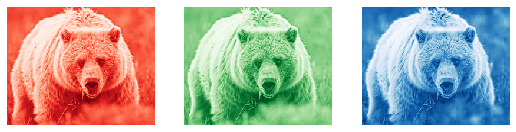

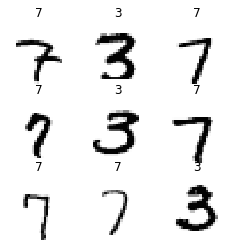

In [14]:
im = image2tensor(Image.open('images/Grizzly.jpg'))
im.shape
_,axs = subplots(1,3)
for bear,ax,color in zip(im,axs,('Reds','Greens','Blues')):
    show_image(255-bear,ax=ax,cmap=color)
dls.show_batch(max_n=9,figsize=(4,4))

In [45]:
from torch.nn import Sequential, Conv2d
from torch.optim import SGD, Adam
from torchvision import models

In [59]:
3 // 2

1

In [95]:
# create a model that maps a set of inputs that produces a prediction of two different classifications 

model = Sequential(
    
    nn.Conv2d(1,8,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3),
    
    nn.Conv2d(8,64,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3),
    
    nn.Conv2d(64,2,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3),
    
    nn.Flatten()
                )

In [96]:
print(model)


Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten()
)


In [97]:
yhat = model(xb)

In [98]:
#after 2nd convolution layer with pooling layer
yhat.shape

torch.Size([64, 2])